# GIS Program Summary Statistics
Frank Donnelly, Geospatial Data Librarian
Baruch College CUNY

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

## Web Stats

In [2]:
geoportal=pd.DataFrame({'Page Views' : [29500, 37254, 40421, 33527],
                       'Unique Views' : [23052, 29285, 31668, 26418],
                       'Downloads' : [3561, 6807, 6682, 5208]},
                      index=['2015.16','2016.17','2017.18','2018.19'])
geoportal

,Page Views,Unique Views,Downloads
2015.16,29500,23052,3561
2016.17,37254,29285,6807
2017.18,40421,31668,6682
2018.19,33527,26418,5208


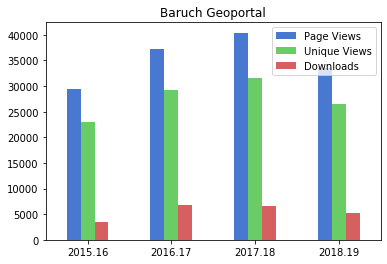

In [3]:
geoportal.plot.bar(rot=0, title='Baruch Geoportal')
plt.savefig('webfig.png')

## Questions Answered
Demographic, geospatial, or GIS related questions answered by email or phone

In [4]:
questions = pd.read_excel('RefLog_Example.xlsx', sheet_name='Questions')
questions.head()

,Year,Semester,Date,Status,Question
0,2007.08,2007FA,2007-10-02,Student,Location organic food stores lower Manhattan
1,2007.08,2007FA,2007-10-15,Faculty,Digital basemaps for various continents
2,2007.08,2007FA,2007-10-16,Faculty,Shapefiles for historical US counties
3,2007.08,2007FA,2007-10-22,Student,Help finding GIS computer resources
4,2007.08,2007FA,2007-10-23,Student,Suggestion for an ArcGIS book


In [5]:
#Summarize as a series
questions_sem=questions.groupby(by='Semester').size()
questions_sem.head()

Semester
2007FA    25
2008FA    11
2008SP    15
2008SU     6
2009FA    15
dtype: int64

In [6]:
#Summarize as a dataframe
questions_yr=questions[['Year','Question']].groupby(by='Year').size().reset_index(name='Questions').set_index('Year')
questions_yr

,Questions
Year,
2007.08,46
2008.09,33
2009.10,47
2010.11,79
2011.12,93
2012.13,109
2013.14,120
2014.15,78
2015.16,92


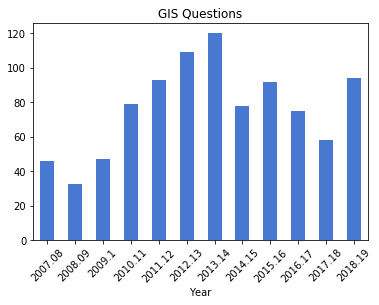

In [7]:
#By designating Year as index, no need to specify arguments for x and y
questions_yr.plot.bar(rot=45, legend=None, title="GIS Questions")
plt.savefig('questions.png',bbox_inches='tight')

In [8]:
questions_status=questions[['Year','Question','Status']].groupby(by=['Year','Status']).size().reset_index(name='Questions')

In [9]:
questions_status.head(10)

,Year,Status,Questions
0,2007.08,CUNY,1
1,2007.08,Faculty,16
2,2007.08,Public,4
3,2007.08,Staff,1
4,2007.08,Student,24
5,2008.09,CUNY,1
6,2008.09,Faculty,10
7,2008.09,Public,1
8,2008.09,Staff,1
9,2008.09,Student,20


In [10]:
#In order to plot as a stacked bar chart, need to do this instead
questions_status2=questions[['Year','Question','Status']].groupby(by=['Year','Status']).size().unstack()
questions_status2

Status,CUNY,Faculty,Public,Staff,Student
Year,,,,,
2007.08,1.0,16.0,4.0,1.0,24.0
2008.09,1.0,10.0,1.0,1.0,20.0
2009.10,4.0,5.0,9.0,3.0,26.0
2010.11,16.0,11.0,22.0,NaN,30.0
2011.12,24.0,8.0,31.0,NaN,30.0
2012.13,24.0,12.0,20.0,6.0,47.0
2013.14,34.0,12.0,21.0,2.0,51.0
2014.15,26.0,12.0,16.0,NaN,24.0
2015.16,12.0,15.0,24.0,NaN,41.0


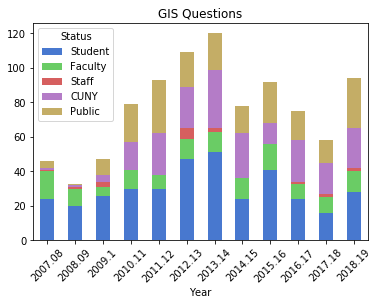

In [11]:
questions_status2[['Student','Faculty','Staff','CUNY','Public']].plot.bar(stacked=True, rot=45, title="GIS Questions")
plt.savefig('questions_status.png',bbox_inches='tight')

In [12]:
questions.Semester=questions.Semester.str[-2:]
questions.head()

,Year,Semester,Date,Status,Question
0,2007.08,FA,2007-10-02,Student,Location organic food stores lower Manhattan
1,2007.08,FA,2007-10-15,Faculty,Digital basemaps for various continents
2,2007.08,FA,2007-10-16,Faculty,Shapefiles for historical US counties
3,2007.08,FA,2007-10-22,Student,Help finding GIS computer resources
4,2007.08,FA,2007-10-23,Student,Suggestion for an ArcGIS book


In [13]:
questions_sem=questions[['Year','Question','Semester']].groupby(by=['Year','Semester']).size().unstack()
questions_sem.rename(columns = {'FA':'Fall','SP':'Spring','SU':'Summer'},inplace=True)
questions_sem

Semester,Fall,Spring,Summer
Year,,,
2007.08,25,15,6
2008.09,11,14,8
2009.10,15,25,7
2010.11,17,45,17
2011.12,38,38,17
2012.13,35,55,19
2013.14,53,43,24
2014.15,28,39,11
2015.16,34,45,13


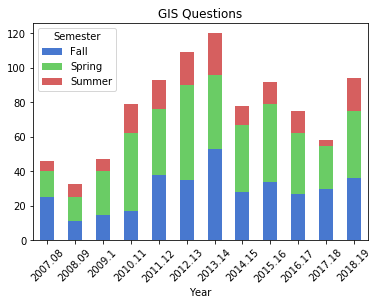

In [14]:
questions_sem.plot.bar(stacked=True, rot=45, title="GIS Questions")

## Consultations
One-on-one in-person research consultations

In [15]:
consult = pd.read_excel('RefLog_Example.xlsx', sheet_name='Consultations')
consult.head()

,Year,Semester,Date,Status,Time (minutes),Question
0,2007.08,2007FA,2007-10-16,Student,75,"Help with class assignment, geoprocessing"
1,2007.08,2007FA,2007-10-22,Student,60,"Help with class assignment, geoprocessing"
2,2007.08,2007FA,2007-10-23,Student,75,"Help with class assignment, geoprocessing"
3,2007.08,2007FA,2007-11-01,Faculty,20,Teaching Direct Marketing staff GIS
4,2007.08,2007FA,2007-11-02,Faculty,30,"Data sources, table joins, measuring distance"


In [16]:
consult_yr=consult[['Year','Question']].groupby(by='Year').size().reset_index(name='Questions').set_index('Year')
consult_yr

,Questions
Year,
2007.08,16
2008.09,14
2009.10,15
2010.11,32
2011.12,27
2012.13,29
2013.14,58
2014.15,52
2015.16,63


In [17]:
consult_status=consult[['Year','Question','Status']].groupby(by=['Year','Status']).size().unstack()
consult_status

Status,CUNY,Faculty,Public,Staff,Student
Year,,,,,
2007.08,NaN,6.0,1.0,NaN,9.0
2008.09,1.0,6.0,NaN,1.0,6.0
2009.10,1.0,NaN,NaN,NaN,14.0
2010.11,6.0,4.0,NaN,NaN,22.0
2011.12,2.0,3.0,1.0,NaN,21.0
2012.13,3.0,7.0,NaN,2.0,17.0
2013.14,10.0,10.0,2.0,2.0,34.0
2014.15,12.0,19.0,1.0,NaN,20.0
2015.16,18.0,9.0,4.0,NaN,32.0


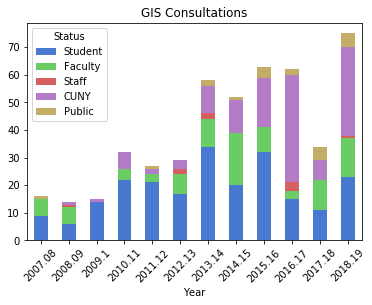

In [18]:
consult_status[['Student','Faculty','Staff','CUNY','Public']].plot.bar(stacked=True, rot=45, title="GIS Consultations")
plt.savefig('consults_status.png',bbox_inches='tight')

In [19]:
consult.Semester=consult.Semester.str[-2:]
consult_sem=consult[['Year','Question','Semester']].groupby(by=['Year','Semester']).size().unstack()
consult_sem.rename(columns = {'FA':'Fall','SP':'Spring','SU':'Summer'},inplace=True)
consult_sem

Semester,Fall,Spring,Summer
Year,,,
2007.08,10,3,3
2008.09,6,6,2
2009.10,7,6,2
2010.11,4,23,5
2011.12,10,15,2
2012.13,10,13,6
2013.14,31,19,8
2014.15,11,34,7
2015.16,26,29,8


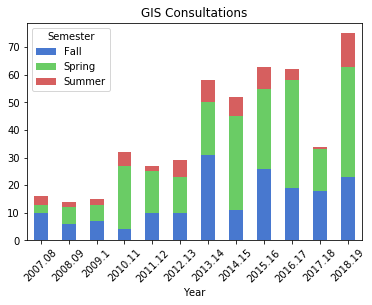

In [20]:
consult_sem.plot.bar(stacked=True, rot=45, title="GIS Consultations")

## Teaching - Course Visits

In [21]:
teach = pd.read_excel('RefLog_Example.xlsx', sheet_name='Teaching')
teach.head()

,Year,Semester,Date,Class,Time (minutes),Attendance,Material
0,2007.08,2007FA,2007-09-19,PAF 9699,15,25,Introduction to Library GIS resources
1,2007.08,2007FA,2007-11-07,PAF 9699,30,25,Introduction to Geodatabases
2,2008.09,2008FA,2008-09-16,LIB 3040,60,25,"Electoral College, political geography"
3,2008.09,2008FA,2008-10-21,ENG 3200,90,20,Introduction to US Census data
4,2009.10,2009FA,2008-09-01,LIB 3010,2175,15,Topics in Information Studies - Geographic Inf...


In [22]:
teach.shape

(106, 7)

In [23]:
to_drop=['GIS Practicum','Spatial DB Practicum','LIB3010']
classes=teach.query('@to_drop not in Class')
classes.shape

(69, 7)

In [24]:
classes_yr=classes[['Year','Class','Attendance']].groupby('Year').agg({'Class':'count', 'Attendance':'sum'})
classes_yr

,Class,Attendance
Year,,
2007.08,2,50
2008.09,2,45
2009.10,2,35
2010.11,6,122
2011.12,4,71
2012.13,10,208
2013.14,12,246
2014.15,6,125
2015.16,8,131


In [25]:
classes_yr.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 2007.08 to 2018.19
Data columns (total 2 columns):
Class         12 non-null int64
Attendance    12 non-null int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [26]:
#Possible bug, maybe weird issues with dates on x-axis, so convert to string
classes_yr.index=classes_yr.index.astype(str)

In [27]:
classes_yr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2007.08 to 2018.19
Data columns (total 2 columns):
Class         12 non-null int64
Attendance    12 non-null int64
dtypes: int64(2)
memory usage: 288.0+ bytes


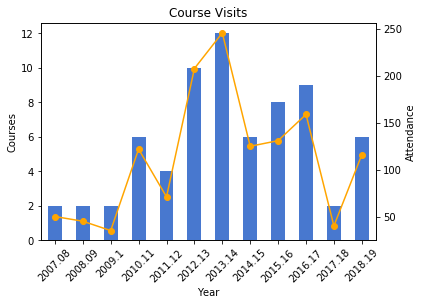

In [28]:
plt.figure()

ax = classes_yr['Attendance'].plot(secondary_y=True, marker='o', color='orange')
ax = classes_yr['Class'].plot(kind='bar', title='Course Visits', rot=45) 
ax.set_ylabel('Courses')
plt.ylabel('Attendance')

plt.savefig('courses.png',bbox_inches='tight')

# GIS Practicum Workshops

In [29]:
gis = pd.read_excel('RefLog_Example.xlsx', sheet_name='GISPracticum')
gis.head()

,Year,Semester,Date,Total,Undergrad,Grad Stdt,Faculty,Staff,Other,Baruch,...,Hunter,John Jay,Lehman,Medgar Evers,NYCCT,Queens,Staten Island,York,Other CUNY,Other.1
0,2010.11,SP2011,2011-03-04,14,NaN,11.0,1.0,1.0,1.0,3.0,...,5.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,2010.11,SP2011,2011-04-01,14,NaN,6.0,7.0,NaN,1.0,4.0,...,1.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2,2010.11,SP2011,2011-05-06,17,NaN,6.0,6.0,4.0,1.0,4.0,...,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0
3,2011.12,FA2011,2011-10-14,15,NaN,11.0,3.0,1.0,NaN,2.0,...,3.0,NaN,3.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN
4,2011.12,FA2011,2011-11-11,15,NaN,10.0,4.0,1.0,NaN,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
gis_yr=gis.groupby('Year')\
.agg({'Year':'count','Total':'sum','Undergrad':'sum','Grad Stdt':'sum','Faculty':'sum','Staff':'sum','Other':'sum'})\
.rename(columns={'Year':'Sessions','Total':'Attendance'})
gis_yr.index=gis_yr.index.astype(str)
gis_yr

,Sessions,Attendance,Undergrad,Grad Stdt,Faculty,Staff,Other
Year,,,,,,,
2010.11,3,45,0.0,23.0,14.0,5.0,3.0
2011.12,4,58,0.0,42.0,12.0,3.0,1.0
2012.13,5,61,7.0,42.0,10.0,1.0,1.0
2013.14,5,62,4.0,35.0,18.0,5.0,0.0
2014.15,3,38,5.0,25.0,5.0,3.0,0.0
2015.16,5,61,9.0,42.0,3.0,4.0,3.0
2016.17,5,57,4.0,26.0,5.0,3.0,19.0
2018.19,3,24,3.0,11.0,4.0,6.0,0.0


In [31]:
gis_label=gis_yr.index.astype(str) +'\n' + '(' +gis_yr['Sessions'].astype(str)+')'
gis_label

Year
2010.11    2010.11\n(3)
2011.12    2011.12\n(4)
2012.13    2012.13\n(5)
2013.14    2013.14\n(5)
2014.15    2014.15\n(3)
2015.16    2015.16\n(5)
2016.17    2016.17\n(5)
2018.19    2018.19\n(3)
dtype: object

<Figure size 432x288 with 0 Axes>

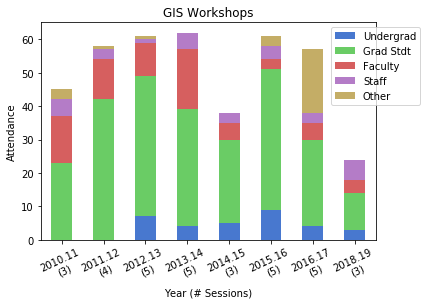

In [32]:
plt.figure()
ax=gis_yr[['Undergrad','Grad Stdt','Faculty','Staff','Other']].plot.bar\
(stacked=True, rot=25, title="GIS Workshops")
 
ax.set_xticklabels(gis_label)
ax.set_xlabel('Year (# Sessions)')
ax.set_ylabel('Attendance')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1))

plt.savefig('workshops.png',bbox_inches='tight')

In [33]:
gis_sum=gis.sum(axis=0)
gis_schools=gis_sum.iloc[8:].sort_values(ascending=False)
gis_schools.rename(index={'Other.1':'Other'},inplace=True)
gis_schools

Baruch           134
Grad Center      102
Hunter            45
Other             29
Lehman            26
John Jay          15
City College      13
Brooklyn          13
Queens            11
Other CUNY         9
Staten Island      5
NYCCT              2
York               1
Medgar Evers       1
dtype: object

In [34]:
smallsch=0
for i,v in gis_schools.iteritems():
    if v < 5:
        smallsch = smallsch+v
        gis_schools.drop(i, inplace=True)
    else:
        pass
gis_schools.loc['Other CUNY']=gis_schools.loc['Other CUNY']+smallsch


In [35]:
smallsch

4.0

In [36]:
gis_schools

Baruch           134
Grad Center      102
Hunter            45
Other             29
Lehman            26
John Jay          15
City College      13
Brooklyn          13
Queens            11
Other CUNY        13
Staten Island      5
dtype: int64

In [37]:
gis_total=gis_schools.sum()
gis_total

406

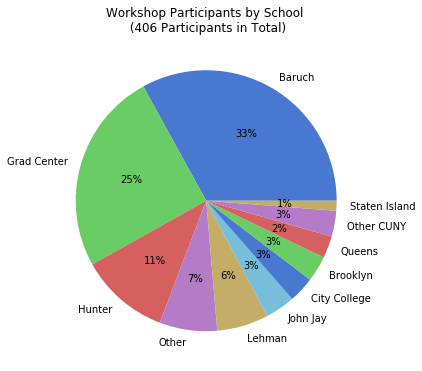

In [38]:
gis_schools.plot.pie(legend=False, figsize=(6,6), \
                     title='Workshop Participants by School \n ({} Participants in Total)'.format(gis_total), autopct='%i%%')
plt.ylabel("")
plt.savefig('schools.png',bbox_inches='tight')